In [2]:
install.packages("xlsx",repos='https://cran.r-project.org')
install.packages("ggplot2",repos='https://cran.r-project.org')

also installing the dependencies 'rJava', 'xlsxjars'



package 'rJava' successfully unpacked and MD5 sums checked
package 'xlsxjars' successfully unpacked and MD5 sums checked
package 'xlsx' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\RtmpmgObXp\downloaded_packages
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\puneeth\AppData\Local\Temp\RtmpmgObXp\downloaded_packages


Loading required package: rJava
Loading required package: xlsxjars
Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [44]:
library("xlsx")
library("ggplot2")

In [45]:
top<-read.xlsx("NHLTop100.xlsx",sheetName = "Top 100")

In [46]:
top2<-top
top2[101,]$G<-285
top2[101,]$A<-462

In [47]:
linreg1<-lm(A~G,data=top)

In [48]:
summary(linreg1)


Call:
lm(formula = A ~ G, data = top)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [49]:
c1<-coef(linreg1)

## This is the general Regression line fit for the given data with rsquare=0.1082305 ,p= 8.317e-04  
 


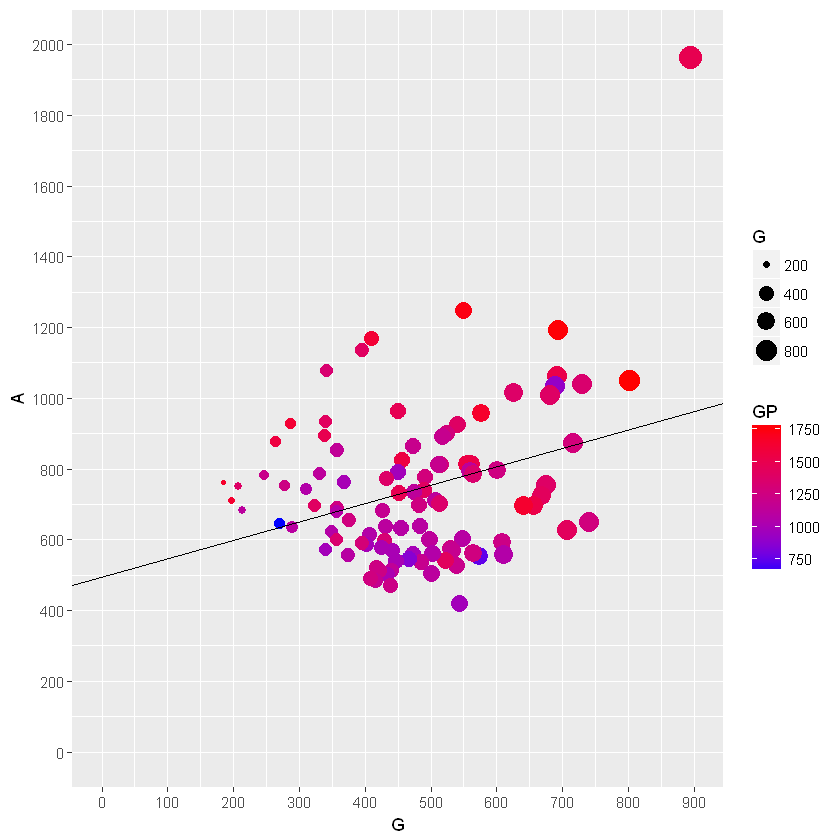

In [50]:
ggplot(top,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept=c1[1],slope=c1[2])

In [51]:
linreg2<-lm(I(A-1963)~I(G-894),data=top)
c2<-coef(linreg2)
c2

(Intercept)    I(G - 894) 
-1003.4220491     0.5202063

In [52]:
yint2<-1963-c2[2]*894
yint2

I(G - 894) 
  1497.936

## This is the regression line forced through wayne gretzky with rsquare =0.1082305  and p=8.317e-04  
  


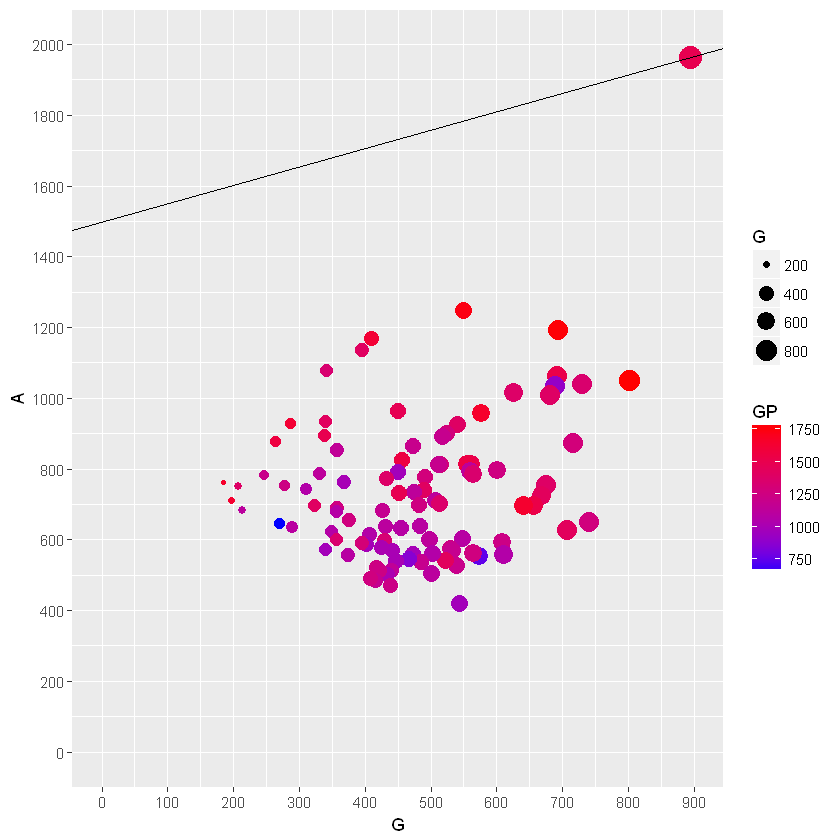

In [53]:
ggplot(top,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept =yint2 ,slope=c2[2])

In [54]:
linreg3<-lm(I(A-462)~I(G-285),data=top2)

In [55]:
c3<-coef(linreg3)
c3

(Intercept)  I(G - 285) 
175.6357602   0.5379576

In [56]:
yint3<-462-c3[2]*285

In [57]:
summary(linreg3)


Call:
lm(formula = I(A - 462) ~ I(G - 285), data = top2)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 175.6358    34.8548   5.039 2.11e-06 ***
I(G - 285)    0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


## This is the regression line forced through patrick

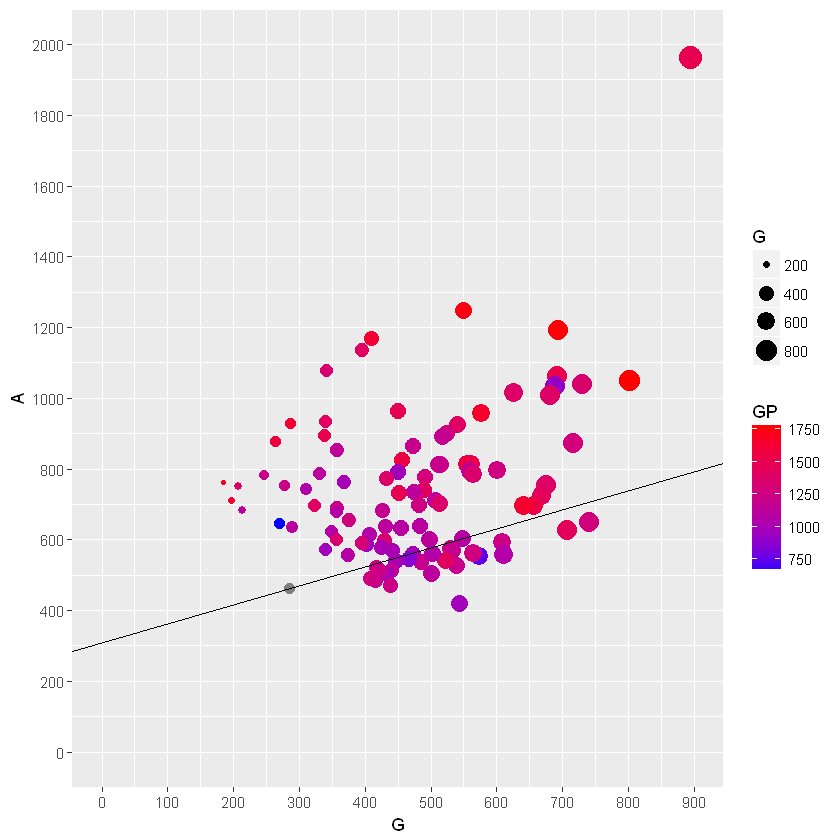

In [58]:
ggplot(top2,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept =yint3 ,slope=c3[2])

In [59]:
linreg4<-lm(A~G+0,data=top)

In [60]:
c4<-coef(linreg4)
c4

G 
1.480334

## This is the Regression line passed through Origin

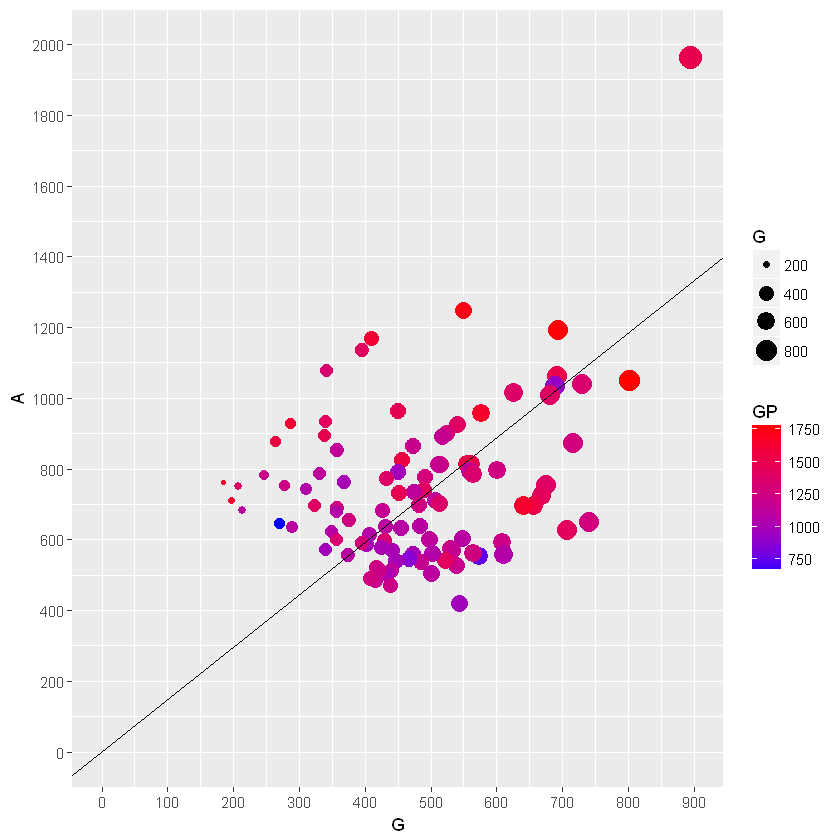

In [61]:
ggplot(top,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept=0,slope=c4[1])

In [62]:
linreg5<-lm(I(A-1963)~I(G-894)+0,data=top)
c5<-coef(linreg5)
c5

I(G - 894) 
  2.684662

In [63]:
yint5<-1963-c5*894

## This is the regression line forced through both origin and wayne gretzky

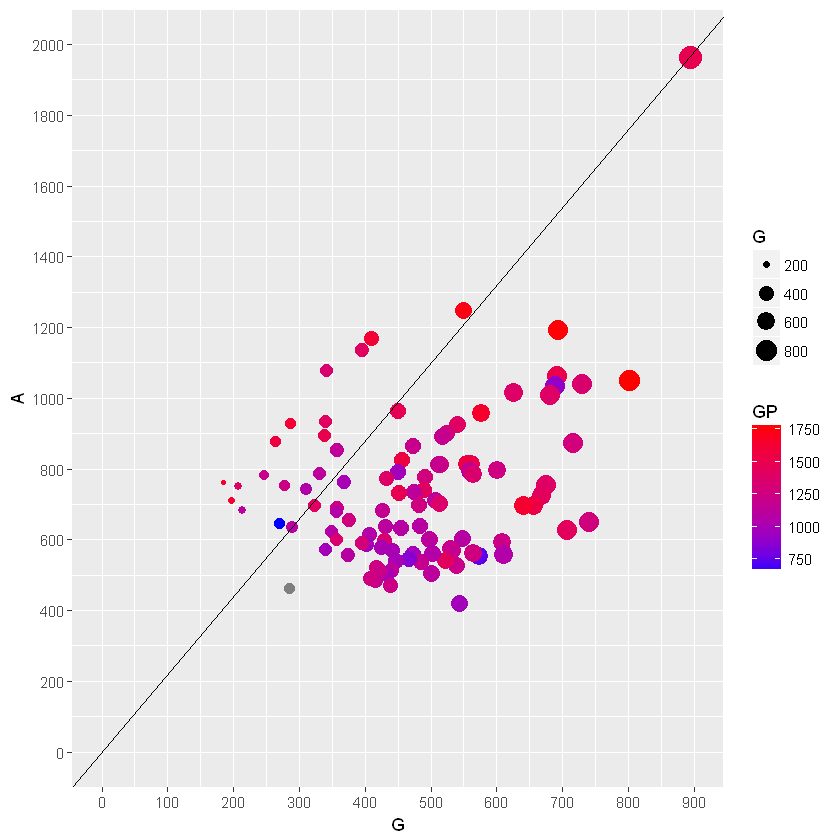

In [64]:
ggplot(top2,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept =0,slope=1963/894)

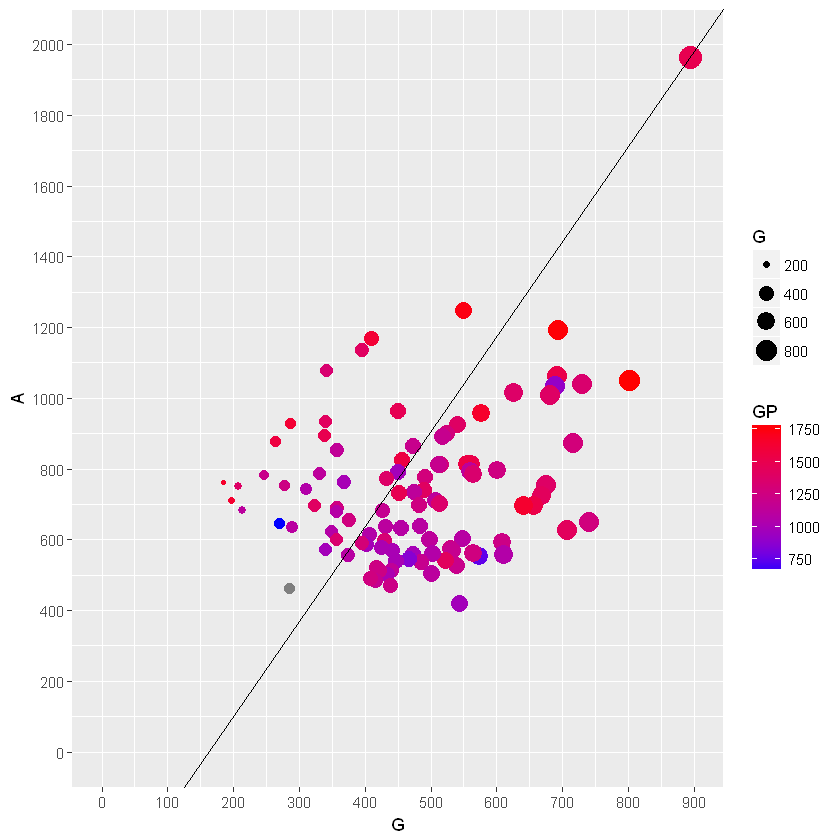

In [65]:
ggplot(top2,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept =yint5 ,slope=c5[1])

In [66]:
linreg6<-lm(I(A-462)~I(G-285)+0,data=top2)
c6<-coef(linreg6)

In [67]:
c6

I(G - 285) 
  1.144932

In [68]:
yint6<-462-c6*285

## This is the Regression line forced through patrick and Origin

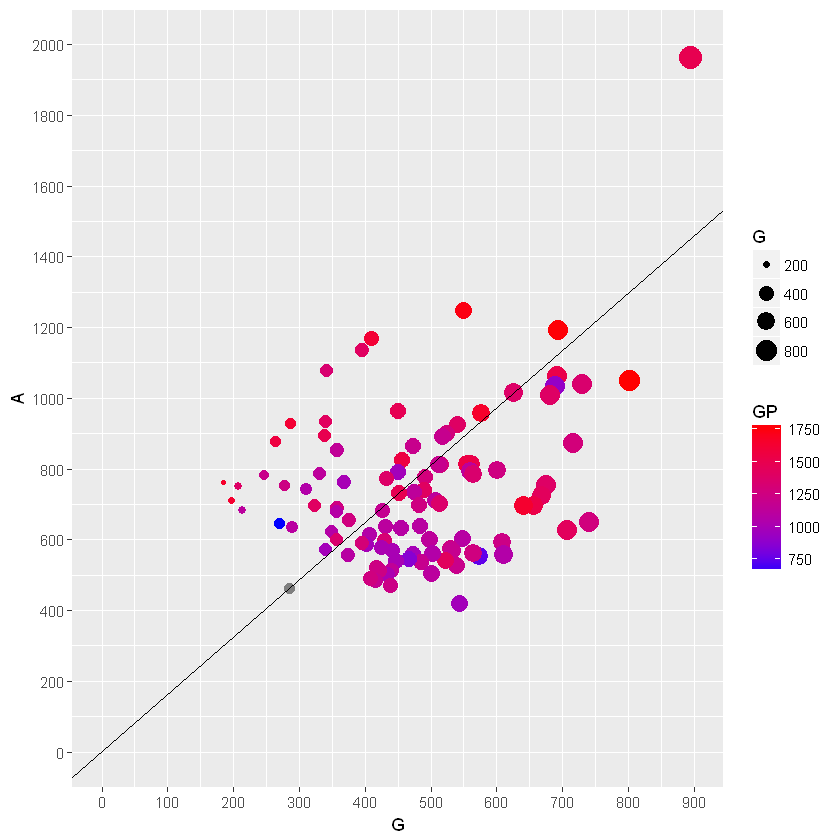

In [69]:
ggplot(top2,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept =0 ,slope=462/285)

In [70]:
ggplot(top2,aes(y=A,x=G,color=GP,size=G))+geom_point()+scale_x_continuous(limits=c(0,900),breaks=seq(0,1000, by=100))+scale_y_continuous(limits=c(0,2000),breaks=seq(0,2000, by=200))+
  scale_color_continuous(low="blue",high="red")+geom_abline(intercept = yint6,slope=c6[1])

In [71]:
sum<-summary(linreg2)

In [72]:
rsq<-c(summary(linreg1)$r.squared,summary(linreg2)$r.squared,summary(linreg3)$r.squared,summary(linreg4)$r.squared,summary(linreg5)$r.squared,summary(linreg6)$r.squared)

In [73]:
names(summary(linreg3))

[1] "call"          "terms"         "residuals"     "coefficients" 
 [5] "aliased"       "sigma"         "df"            "r.squared"    
 [9] "adj.r.squared" "fstatistic"    "cov.unscaled"

In [74]:
summary(linreg3)$cov.unscaled

(Intercept)   I(G - 285)   
(Intercept)  2.841451e-02 -9.819692e-05
I(G - 285)  -9.819692e-05  5.208428e-07

In [75]:
rsq

[1] 0.1082305 0.1082305 0.1160387 0.8981861 0.9091456 0.5759325

In [76]:
model<-c("general","through wayne getzy","through patrick","general through origin","getzky through orogin","patrick through origin")

In [77]:
summary(linreg6)


Call:
lm(formula = I(A - 462) ~ I(G - 285) + 0, data = top2)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -112.83   40.72  167.42  803.74 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)  1.14493    0.09825   11.65   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 230.6 on 100 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5717 
F-statistic: 135.8 on 1 and 100 DF,  p-value: < 2.2e-16


In [78]:
pvalue<-c(0.0008317,0.0008317,0.0004909, 2.2e-16, 2.2e-16, 2.2e-16)

In [79]:
tab<-data.frame(model,rsq,pvalue)

## These are the different Values obtained for several regression lines before and after forcing

# Interpreting the Results
### So we can Clearly observe when the models are forced through origin, then the value of r square increases and the value of P decreases.Hence we can say that the models forced through origin are a better fit than the models that are not forced through origin. 

In [80]:
tab

model                  rsq       pvalue   
1 general                0.1082305 8.317e-04
2 through wayne getzy    0.1082305 8.317e-04
3 through patrick        0.1160387 4.909e-04
4 general through origin 0.8981861 2.200e-16
5 getzky through orogin  0.9091456 2.200e-16
6 patrick through origin 0.5759325 2.200e-16